# **Financial News Analysis**

***By Beckham Berhanu***

---



# **TASK 1**


---





# Load and Clean the Data

In [1]:
# Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import neccessary libraries for loading and cleaning the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#Load the dataset
path1="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/raw_analyst_ratings.csv"
path2="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/AAPL_historical_data.csv"
path3="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/AMZN_historical_data.csv"
path4="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/GOOG_historical_data.csv"
path5="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/META_historical_data.csv"
path6="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/MSFT_historical_data.csv"
path7="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/NVDA_historical_data.csv"
path8="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/TSLA_historical_data.csv"

In [4]:
print("Loading Datasets...")
df_ratings = pd.read_csv(path1)
df_apple = pd.read_csv(path2)
df_amazon = pd.read_csv(path3)
df_google = pd.read_csv(path4)
df_meta = pd.read_csv(path5)
df_msft = pd.read_csv(path6)
df_nvdia = pd.read_csv(path7)
df_tsla = pd.read_csv(path8)

# Display first few rows of each dataset to review
print("\nRaw Analyst Ratings Dataset :")
print(df_ratings.head())

print("\nApple Historical Data:")
print(df_apple.head())

print("\nAmazon Historical Data:")
print(df_amazon.head())

print("\nGoogle Historical Data:")
print(df_google.head())

print("\nMeta Historical Data:")
print(df_meta.head())

print("\nMicrosft Historical Data:")
print(df_msft.head())

print("\nNvidia Historical Data:")
print(df_nvdia.head())

print("\nTesla Historical Data:")
print(df_tsla.head())

Loading Datasets...

Raw Analyst Ratings Dataset :
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 1

In [5]:
# Check for missing values in each dataset

print(df_ratings.isnull().sum())
print(df_msft.isnull().sum())
print(df_apple.isnull().sum())
print(df_amazon.isnull().sum())
print(df_google.isnull().sum())
print(df_meta.isnull().sum())
print(df_tsla.isnull().sum())
print(df_nvdia.isnull().sum())

# Drop 'Unamed: 0' column
df_ratings = df_ratings.drop(columns=['Unnamed: 0'], errors='ignore')

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            

Handle missing Values

In [6]:
# Drop missing values

df_ratings = df_ratings.dropna()
df_msft = df_msft.dropna()
df_apple = df_apple.dropna()
df_amazon = df_amazon.dropna()
df_google = df_google.dropna()
df_meta = df_meta.dropna()
df_tsla = df_tsla.dropna()
df_nvdia = df_nvdia.dropna()
df_ratings = df_ratings.dropna()



# Descreptive Statistics


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


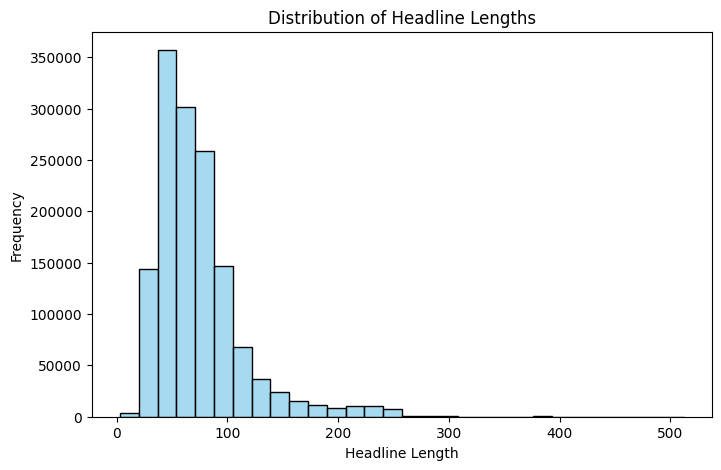

In [18]:
# Headline lengths

df_ratings['headline_length'] = df_ratings['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(df_ratings['headline_length'].describe())

# Plot headline lengths
plt.figure(figsize=(8, 5))
sns.histplot(df_ratings['headline_length'], bins=30, color='skyblue')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


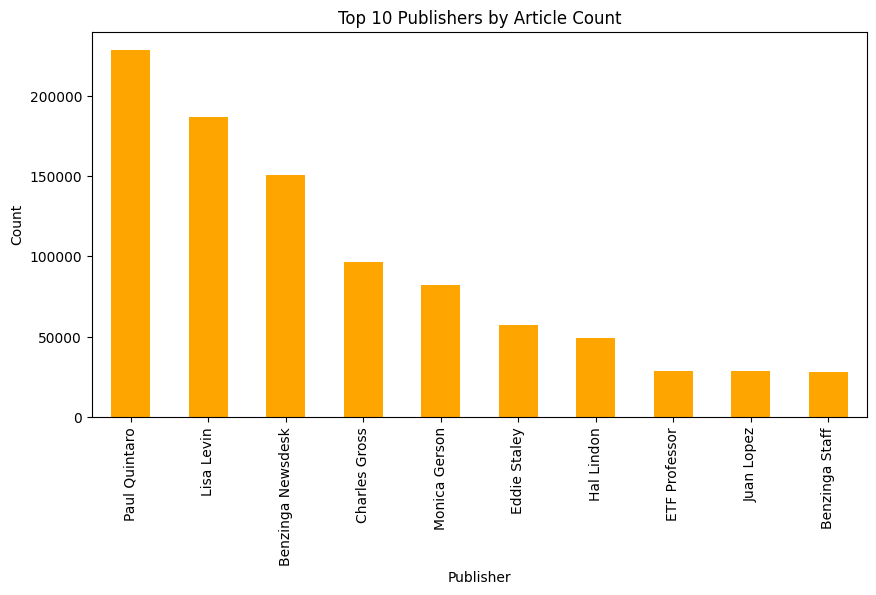

In [19]:
# Articles per publisher
publisher_counts = df_ratings['publisher'].value_counts()
print("\nTop 10 Publishers:")
print(publisher_counts.head(10))

# Plot top publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.show()

<ipython-input-20-dd0f59986457>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ratings['year_month'] = df_ratings['date'].dt.to_period('M')


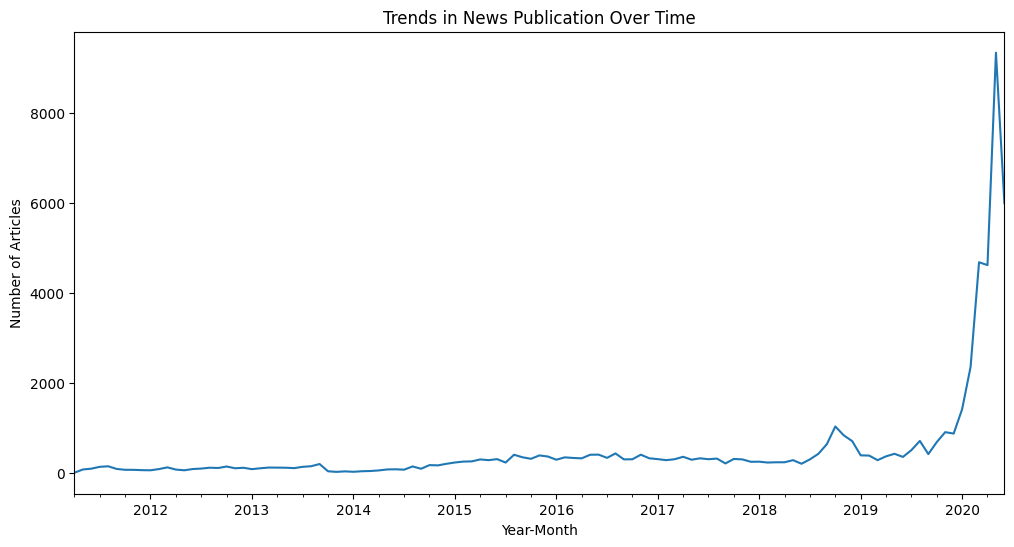

In [20]:
# Analyze publication dates
df_ratings['date'] = pd.to_datetime(df_ratings['date'], errors='coerce')
df_ratings['year_month'] = df_ratings['date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df_ratings['year_month'].value_counts().sort_index().plot()
plt.title("Trends in News Publication Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.show()


Unique Stocks in Headlines Data:
['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']

Number of Articles Per Stock:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64


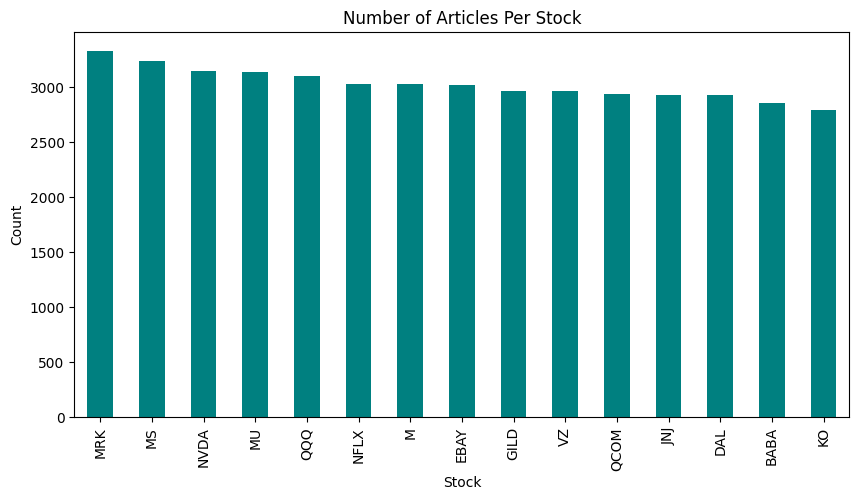

In [24]:
# Check unique stocks
print("\nUnique Stocks in Headlines Data:")
print(df_ratings['stock'].unique())

# Count articles per stock
stock_counts = df_ratings['stock'].value_counts()
print("\nNumber of Articles Per Stock:")
print(stock_counts)

# Plot articles per stock
plt.figure(figsize=(10, 5))
stock_counts.head(15).plot(kind='bar', color='teal')
plt.title("Number of Articles Per Stock")
plt.xlabel("Stock")
plt.ylabel("Count")
plt.show()

In [ ]:
# Convert 'Timestamp' column to datetime
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])

# Sentiment Analysis

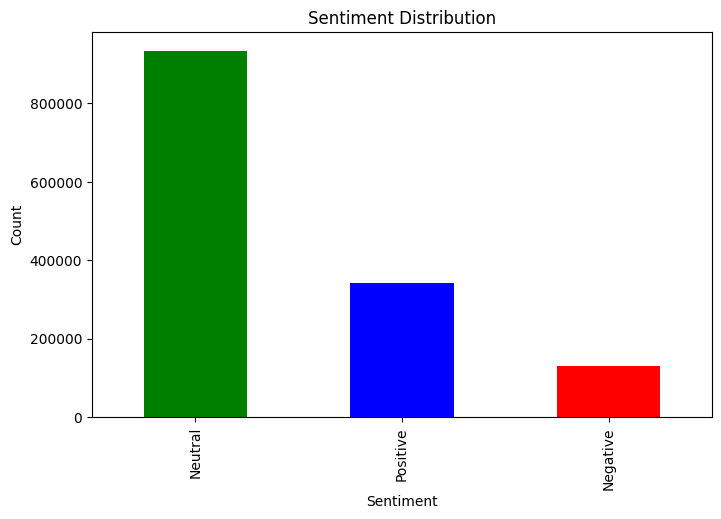

In [7]:
# import libraries for sentiment analysis and topic modelling
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

# Clean column names
df_ratings.columns = [col.strip().lower() for col in df_ratings.columns]

# Perform sentiment analysis
def analyze_sentiment(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    except:
        return 'Neutral'

df_ratings['sentiment'] = df_ratings['headline'].apply(analyze_sentiment)

# Visualize sentiment distribution
sentiment_counts = df_ratings['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Topic Modeling

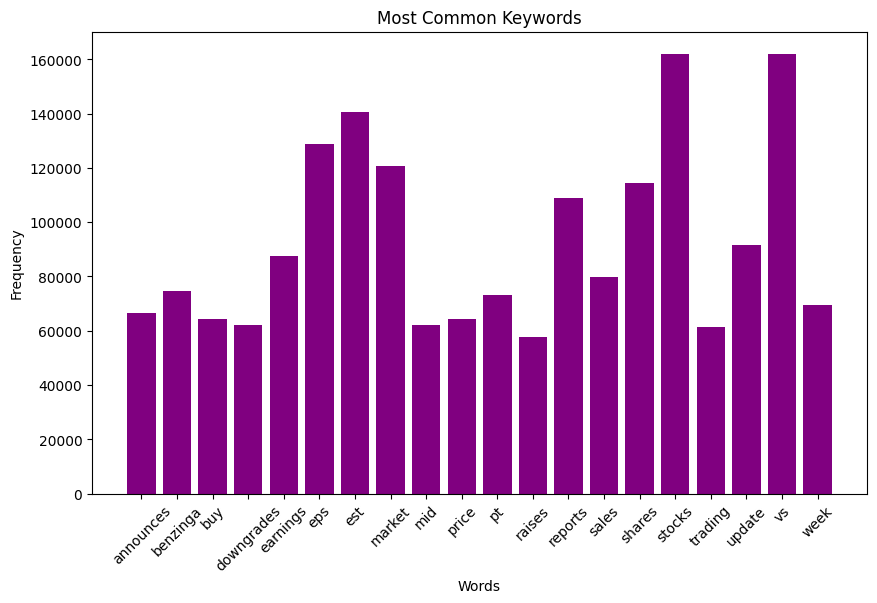

In [10]:
# Extract common keywords using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(df_ratings['headline'].fillna('')).toarray()
words = vectorizer.get_feature_names_out()
word_frequencies = word_counts.sum(axis=0)

# Plot word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, word_frequencies, color='purple')
plt.title('Most Common Keywords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Perform topic modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(word_counts)
terms = vectorizer.get_feature_names_out()

# Display top words in each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print(" ".join([terms[j] for j in topic.argsort()[-10:]]))

Topic 1:
trading vs shares downgrades week update mid reports market earnings
Topic 2:
shares buy price trading pt mid market announces week stocks
Topic 3:
earnings shares trading update raises reports sales eps est vs
Topic 4:
benzinga market shares update announces downgrades raises buy price pt
Topic 5:
buy sales price downgrades mid market trading benzinga update shares


In [25]:
# from textblob import TextBlob

# news_data['sentiment'] = news_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
# print(news_data[['headline', 'sentiment']].head())


In [ ]:
import yfinance as yf

# Load stock data
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-12-31')
print(stock_data.head())




---


# **TASK 2**


---

